In [7]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from livelossplot import PlotLossesKerasTF

In [6]:
batch_size = 64

train_generator = ImageDataGenerator()
train = train_generator.flow_from_directory("train/train/", target_size=(48,48), color_mode="grayscale", batch_size=batch_size, class_mode='categorical', shuffle=True)

validation_generator = ImageDataGenerator()
validation = validation_generator.flow_from_directory("test/test", target_size=(48,48), color_mode="grayscale", batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 26151 images belonging to 7 classes.
Found 11208 images belonging to 7 classes.


In [3]:
model = Sequential()

model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

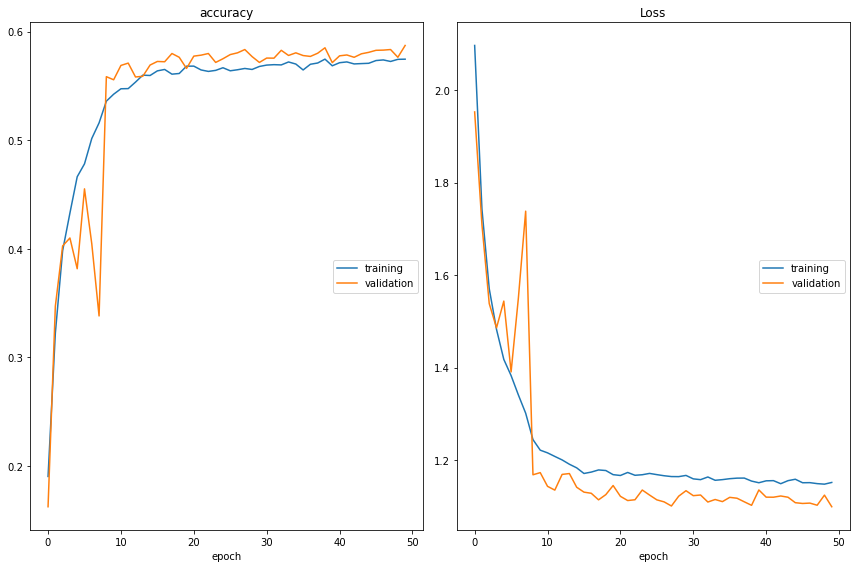

accuracy
	training         	 (min:    0.190, max:    0.575, cur:    0.575)
	validation       	 (min:    0.162, max:    0.587, cur:    0.587)
Loss
	training         	 (min:    1.148, max:    2.096, cur:    1.152)
	validation       	 (min:    1.100, max:    1.953, cur:    1.100)

Epoch 00050: saving model to model_weights_1.h5
Wall time: 10h 19min 34s


In [4]:
epochs = 50
epoch_steps = train.n//train.batch_size
val_steps = validation.n//validation.batch_size
learn_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=2, min_lr=0.00001, mode='auto')
cp = ModelCheckpoint("model_weights_1.h5", monitor='val_accuracy',save_weights_only=True, mode='max', verbose=1)
cb = [PlotLossesKerasTF(), cp, learn_rate]

history = model.fit(x=train,steps_per_epoch=epoch_steps,epochs=epochs,validation_data = validation,validation_steps = val_steps,callbacks=cb)

In [5]:
json = model.to_json()
with open("model.json", "w") as file:
    file.write(json)